In [288]:
import os
import string
import pandas as pd
import nltk
from nltk.util import bigrams, ngrams
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.preprocessing import MinMaxScaler

### Function to read a CSV file and return a DataFrame

In [289]:
def read_csv_file(file_name):
    file_path = os.path.join(datasets_folder, file_name)
    if os.path.isfile(file_path):
        return pd.read_csv(file_path)
    return None

### Function to preprocess text by lowercasing, removing stopwords, and tokenizing

In [290]:
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))  # Use the appropriate language for your text
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words and not any(char in word for char in ['https', '@'])]
    return filtered_tokens

### Function to generate and plot n-grams

In [291]:
# Function to generate and plot n-grams
def generate_and_plot_ngrams(df, column_name, n, title, bar_color='skyblue'):
    df[column_name] = df['preprocessed_text'].apply(lambda x: list(ngrams(x, n)))

    # Count the frequency of n-grams
    ngram_frequency = Counter()
    for ngram_list in df[column_name]:
        ngram_frequency.update(ngram_list)

    # Get the most frequent n-grams while excluding specific terms and punctuation
    exclude_terms = {'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :','mundo'}

    exclude_punctuation = set(string.punctuation)

    most_common_ngrams = [(ngram, freq) for ngram, freq in ngram_frequency.most_common() if all(term not in ngram and all(char not in ngram for char in exclude_punctuation) for term in exclude_terms)][:10]

    # Unzip n-gram and frequency into separate lists and convert n-grams to strings
    ngram, frequency = zip(*most_common_ngrams)
    ngram = [' '.join(n) for n in ngram]

    # Create a chart for the most frequent n-grams
    plt.figure(figsize=(12, 8))  # Increase figure size
    plt.bar(ngram, frequency,color=bar_color)
    plt.ylabel(f'Frequency')
    plt.xlabel(f'{n}-grams')
    plt.title(title)
    plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()

# Example usage:
# generate_and_plot_ngrams(df, 'ngrams', 2, 'Top 10 Bigrams')


In [282]:
datasets_folder = "../datasets"
file_name = "tupi_hierarchy.csv"
df_tupi_hier = read_csv_file(file_name)
df_tupi_hier_filter = df_tupi_hier.query(f"hate == 1")
color = "#1696D2"

/tmp/ipykernel_24194/3729736624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tupi_hier_filter['text'] = df_tupi_hier_filter['text'].str.lower()


/tmp/ipykernel_24194/3729736624.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tupi_hier_filter['preprocessed_text'] = df_tupi_hier_filter['text'].apply(preprocess_text)
/tmp/ipykernel_24194/1715826465.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['preprocessed_text'].apply(lambda x: list(ngrams(x, n)))


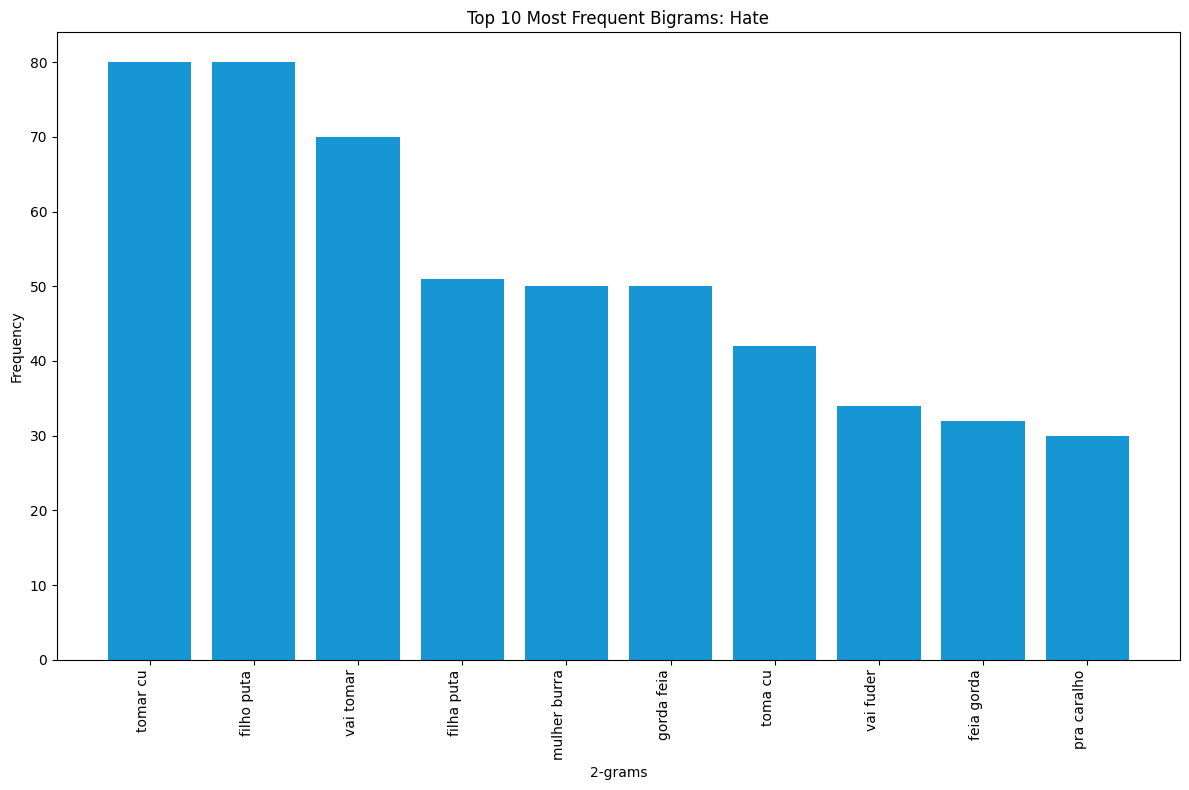

In [283]:
if df_tupi_hier_filter is not None:
    df_tupi_hier_filter['text'] = df_tupi_hier_filter['text'].str.lower()
    df_tupi_hier_filter['preprocessed_text'] = df_tupi_hier_filter['text'].apply(preprocess_text)

    # Generate and plot bigrams with stopwords
    #generate_and_plot_ngrams(df_tupi_hier, 'bigrams', 2, 'Top 10 Most Frequent Bigrams (With Stopwords)')

    # Generate and plot bigrams without stopwords
    generate_and_plot_ngrams(df_tupi_hier_filter, 'bigrams', 2, 'Top 10 Most Frequent Bigrams: Hate',color)

    # Generate and plot trigrams without stopwords
    #generate_and_plot_ngrams(df_tupi_hier_filter, 'trigrams', 3, 'Top 10 Most Frequent Trigrams')

file_name = "tupi_binary.csv"
df_tupi_binary = read_csv_file(file_name)

In [284]:
df_tupi_hier_filter.head()

,id,text,aggressive,hate,ageism,aporophobia,body_shame,capacitism,lgbtphobia,political,racism,religious_intolerance,misogyny,xenophobia,other,researcher,year,source,preprocessed_text,bigrams
0,1.65848623693028e+18,@user @user @user quanto vc pagava na época da...,1,1,0,0,0,1,0,1,0,0,0,0,0,oliveira et al,2023,twitter,"[user, user, user, quanto, vc, pagava, época, ...","[(user, user), (user, user), (user, quanto), (..."
1,1.65848623777333e+18,@user os árabes já vão lhes chutar do país ??,1,1,0,0,0,0,0,0,0,0,0,1,0,oliveira et al,2023,twitter,"[user, árabes, vão, chutar, país, ?, ?]","[(user, árabes), (árabes, vão), (vão, chutar),..."
2,1.65848960585394e+18,@user @user @user @user @user tem que desenhar...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter,"[user, user, user, user, user, desenhar, expli...","[(user, user), (user, user), (user, user), (us..."
3,1.65849012716374e+18,@user @user chola mais gado. e se não quiser p...,1,1,0,0,0,0,0,1,0,0,0,0,0,oliveira et al,2023,twitter,"[user, user, chola, gado, ., quiser, pagar, ba...","[(user, user), (user, chola), (chola, gado), (..."
4,1.65849018793945e+18,michele micheque nao tinha cartao do bolsonaro...,1,1,0,0,0,1,0,0,0,0,0,0,0,oliveira et al,2023,twitter,"[michele, micheque, nao, cartao, bolsonaro, pq...","[(michele, micheque), (micheque, nao), (nao, c..."


In [285]:
df_tupi_hier_filter_2 = df_tupi_hier_filter.query(f"other == 1")

In [286]:
# ... (previous code)

### Function to generate and display a table with the 20 most frequent words
def generate_and_display_word_table(df, column_name, title, stop_words):
    # Flatten the list of preprocessed tokens
    all_tokens = [token for tokens in df[column_name] for token in tokens]

    # Count the frequency of each word
    word_frequency = Counter(all_tokens)

    # Get the 20 most frequent words while excluding specific terms and punctuation
    exclude_terms = {'desse', 'aí', 'n', 'https', '@', 'user', 'link', '#', '??', '!!', '_:', '.:', '!:', '? ?', '! !', '_ :', '! :', '? :', 'rt',
    'ta', 'tá', 'q', 'pq', 'ter', 'pra', 'vcs', 'todos', 'aí', 'nunca', 'fala', 'ver', 'coisa', 'desse', 'todo', 'quer', 'agora', 'faz',
    'n', 'fazer', 'ainda', 'dia', 'pode', 'tudo', 'nao', 'nada', 'vc', 'vai', 'pq', 'por que', 'porque', 'eh', 'ne', 'né', 'é', 'p'
    'la', 'lá', 'ai', 'aí', 'to', 'tô','sobre','fez','pois','onde','aqui','sempre','sim'}
    exclude_punctuation = set(string.punctuation)

    most_common_words = [(word, freq) for word, freq in word_frequency.most_common(100) if
                         word.lower() not in stop_words and
                         not any(char in word for char in exclude_terms) and
                         all(char not in word for char in exclude_punctuation)]

    # Create a DataFrame for the most frequent words
    word_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

    # Display the table
    print(f'\nTop 20 Most Frequent Words - {title}\n')
    print(word_df)

# ... (previous code)

# Call preprocess_text to get stop_words
stop_words = set(preprocess_text(''))

In [287]:
# Generate and display a table with the 20 most frequent words
generate_and_display_word_table(df_tupi_hier_filter_2, 'preprocessed_text', 'All Words', stop_words)


Top 20 Most Frequent Words - All Words

       Word  Frequency
0        cu        228
1   caralho        167
2      cara        152
3     porra        135
4      lixo        102
5     homem         95
6     filho         93
7     burro         89
8     merda         85
9       fdp         82
10      pau         78
11    filha         68
12   babaca         65
13   mulher         59
14     feia         53
15      bem         48
16        p         47
17     feio         47
18   pessoa         43
19    fuder         43
20      vou         42
21     sabe         42
22     deus         42
23     vida         40
24      tão         39
25    ficar         39
26      dar         38
27    viado         36
28      vsf         36
29      pro         35
30   melhor         34
31     fica         34
32     povo         34
33   brasil         34
34    deixa         34
